# t-검정

In [1]:
# 귀무가설 : 건전지의 수명은 1000시간이다. 
# 대립가설 : 건전지의 수명은 1000시간이 아니다. 

In [2]:
# 1) 데이터의 분포가 정규분포인지 학인 : Shapiro-wilk 검정을 실시 
# 귀무가설 : 자료가 정규분포이다. 
# 대립가설 : 자료가 정규분포가 아니다. 

bat <- c(980, 1008, 968, 1032, 1012, 1002, 996, 1017)
shapiro.test(bat)


	Shapiro-Wilk normality test

data:  bat
W = 0.97706, p-value = 0.9469


In [3]:
# p-value = 0.9469 > 0.05 --> 귀무가설 채택(=> 정규분포)

In [4]:
# t-검정 
t.test(bat, mu = 1000, alternative = "two.sided")

# mu : 비교하는 대상의 평균 
# alternative =
# - two.sided : 데이터와 평균과 다르다. 
# - greater : 데이터가 평균보다 크다. 
# - less : 데이터가 평균보다 작다. 


	One Sample t-test

data:  bat
t = 0.25891, df = 7, p-value = 0.8032
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  984.7508 1018.9992
sample estimates:
mean of x 
 1001.875 


In [5]:
# p-value = 0.8032 > 0.05 --> 귀무가설 채택(=> 건전지의 수명은 1000시간)

In [6]:
# 어떤 학급의 수학점수 평균 : 55점 
# 0교시 수업 후에 학생들의 성적이 올랐을까?
# 귀무가설 : 성적은 오르지 않았다. 
# 대립가설 : 성적이 올랐다. 

result <- c(58, 49, 39, 99, 32, 88, 62, 30, 55, 65, 44, 55, 57, 53, 88, 42, 39)
# 정규분포 확인 
shapiro.test(result)


	Shapiro-Wilk normality test

data:  result
W = 0.91143, p-value = 0.1058


In [7]:
# p-value = 0.1058 > 0.05 --> 귀무가설 채택 (정규분포)

In [8]:
mean(result) #55점보다는 올랐다고 보여지니까. 

[1] 56.17647

In [9]:
summary(result)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   42.00   55.00   56.18   62.00   99.00 

In [10]:
# t검정 
t.test(result, mu= 55, alternative = "greater")


	One Sample t-test

data:  result
t = 0.24546, df = 16, p-value = 0.4046
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 47.80855      Inf
sample estimates:
mean of x 
 56.17647 


In [11]:
# p-value = 0.4046 > 0.05 --> 귀무가설 채택 (성적이 오르지 않았다.)

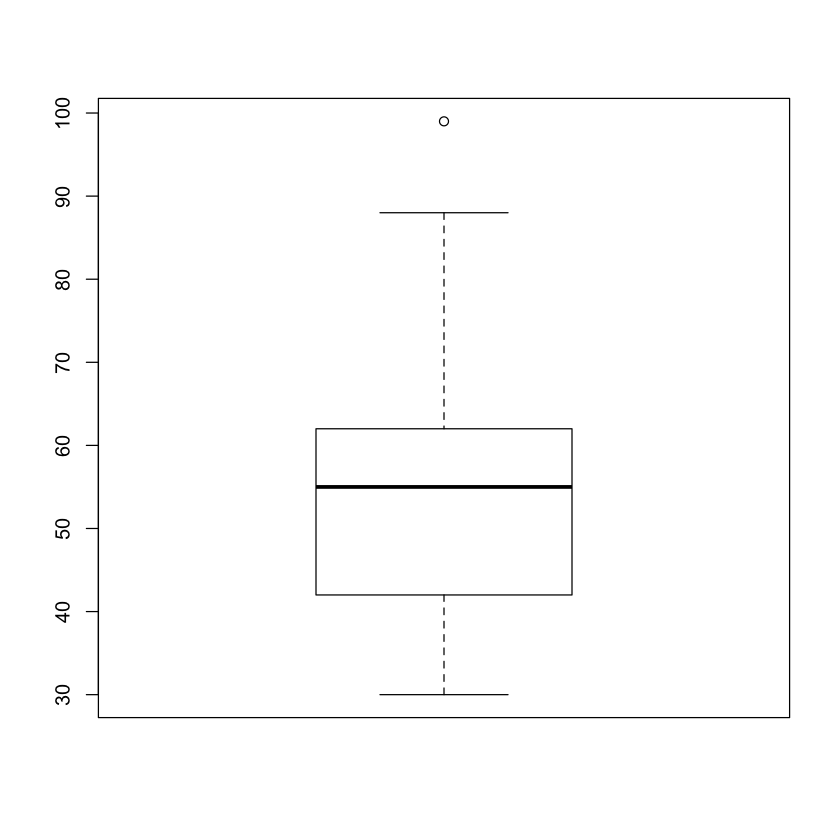

In [12]:
boxplot(result) # 이상치 99점 하나 발견됨. (t검정은 이상치를 빼고 계산한 값이기 때문에 55점보다 점수가 오르지 않았음)

In [14]:
# 표본이 2개인 t-검정 
# 귀무가설 : 복용 전후의 차이가 없다. 
# 대립가설 : 복용 전후의 차이가 있다. 

pre <- c(13.2, 8.2, 10.9, 14.3, 10.7, 6.6, 9.5, 10.8, 8.8, 13.3)
post <- c(14,  8.8, 11.2, 14.2, 11.8, 6.4, 9.8, 11.3, 9.3, 13.6)

In [16]:
t.test(pre, post, alternative = "two.sided")


	Welch Two Sample t-test

data:  pre and sort(post)
t = -0.36891, df = 17.987, p-value = 0.7165
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.745046  1.925046
sample estimates:
mean of x mean of y 
    10.63     11.04 


In [17]:
# p-value = 0.7165 > 0.05 --> 귀무가설 채택 (복용 전후의 차이가 없다.)

## 상관관계

In [18]:
y <- c(1,2,3,4)
z <- c(0,9,5,7) # but (0,5,7,9)로 순서만 바꿔주면 r=0.96, l로 나타남. (번지수끼리 비교한 것이기 때문에 순서가 매우 중요함) 

In [19]:
cor(y,z)

[1] 0.5682473

In [21]:
# 피어슨 상관계수 Pearson's correlation --> 데이터 많을 때 
cor(y, z, method = "pearson")

# 스피어만 상관계수 
cor(y, z, method = "spearman")

[1] 0.5682473

[1] 0.4

## 콜모고로프-스미노프 검정(KS Test)
: 주어진 2개의 데이터가 같은 분포인지를 검정하는 것

In [22]:
# 귀무가설 : 두개의 데이터의 분포가 다르다. 
# 대립가설 : 두개의 데이터의 분포가 같다. 

In [23]:
x <- rnorm(50)
y <- runif(50)

ks.test(x, y)


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.66, p-value = 1.318e-10
alternative hypothesis: two-sided


In [24]:
# p-value = 1.318e-10 < 0.05 --> 대립가설 채택 (두 개의 데이터의 분포가 같다)

## 부호 검정 
- 2개의 데이터 사이에 차이가 있는지 검정하는 것

In [25]:
# 식사 전과 식사 후의 음료수 맛에 대한 평가 (숙취해소음료)
x <- c(4, 1, 1, 4, 3, 3, 2, 5, 3, 3) # 식사 전의 음료수 맛에 대한 평가
y <- c(1, 1, 3, 2, 5, 1, 4, 4, 3, 1) # 식사 후의 음료수 맛에 대한 평가

In [28]:
# 귀무가설 : 유의한 차이가 없다. 
# 대립가설 : 유의한 차이가 있다. 
x[x>y] # 전과 후의 개수 가지고 검증하는 것. x가 y 보다 큰 경우를 비교 

[1] 4 4 3 5 3

In [27]:
binom.test(c(length(x[x>y]), length(x[x<y])))


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 5, number of trials = 8, p-value = 0.7266
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2448632 0.9147666
sample estimates:
probability of success 
                 0.625 


In [29]:
# p-value = 0.7266 > 0.05 --> 귀무가설 채택 (유의한 차이가 없다)

## 비율 검정 
: 2개의 데이터 사이에 비율의 차이가 있는지를 검정

In [31]:
# 맥주를 좋아하시나요? 라는 질문에 서울에서는 400명 중 360명, 부산에서는 200명 중 136명이 좋아한다고 답했다면 둘의 비율 차이가 있다고 할 수 있는가? 
# 귀무가설 : 유의한 차이가 없다. 
# 대립가설 : 유의한 차이가 있다. 

sample <- c(400, 200)
hite <- c(360, 136)

prop.test(hite, sample)


	2-sample test for equality of proportions with continuity correction

data:  hite out of sample
X-squared = 43.515, df = 1, p-value = 4.207e-11
alternative hypothesis: two.sided
95 percent confidence interval:
 0.14523 0.29477
sample estimates:
prop 1 prop 2 
  0.90   0.68 


In [32]:
# p-value = 4.207e-11 < 0.05 --> 대립가설 채택 (지역에 따라 유의한 차이가 있다)

---
# 회귀분석 regression
### 단순회귀분석

In [37]:
regression <- read.csv("../Data/regression.csv")
head(regression)
tail(regression)

age,Height,Weight
0~3Months,59.1,5.9
3~6Months,66.7,8.0
6~9Months,71.4,8.9
9~12Months,75.0,10.1
12~18Months,80.1,10.9
2Year,87.8,13.2


,age,Height,Weight
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


In [38]:
str(regression)

'data.frame':	31 obs. of  3 variables:
 $ age   : Factor w/ 31 levels "0~3Months","10Year",..: 1 19 26 31 5 15 18 21 23 25 ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


In [40]:
# 기본 통계량    
summary(regression$Height)
summary(regression$Weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   59.1   105.7   150.7   135.8   169.8   173.8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.90   17.90   45.20   42.62   66.65   72.30 

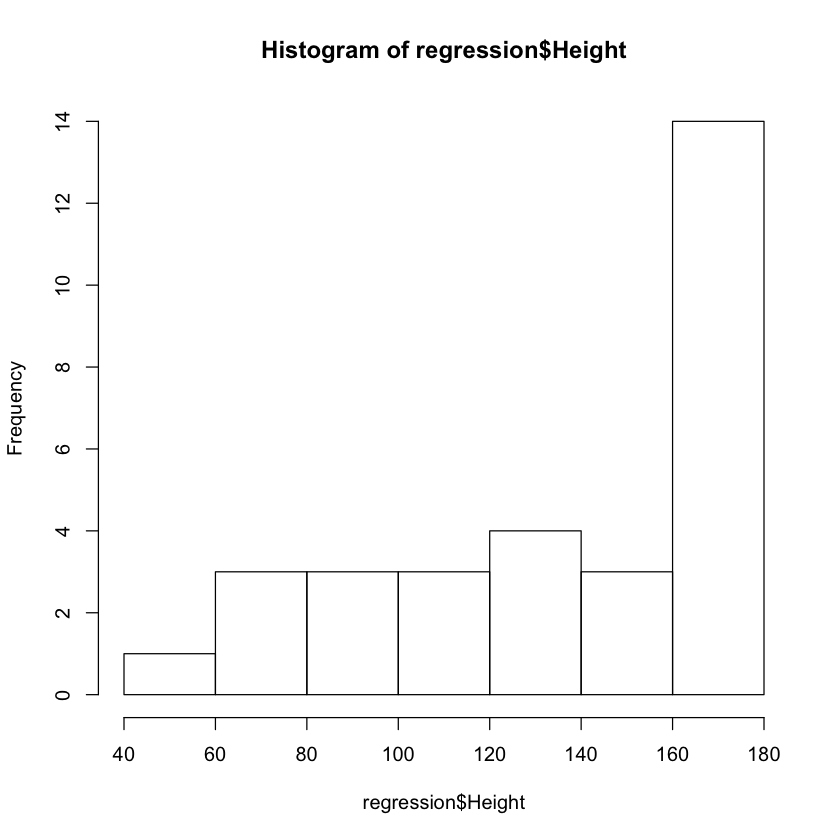

In [41]:
hist(regression$Height)

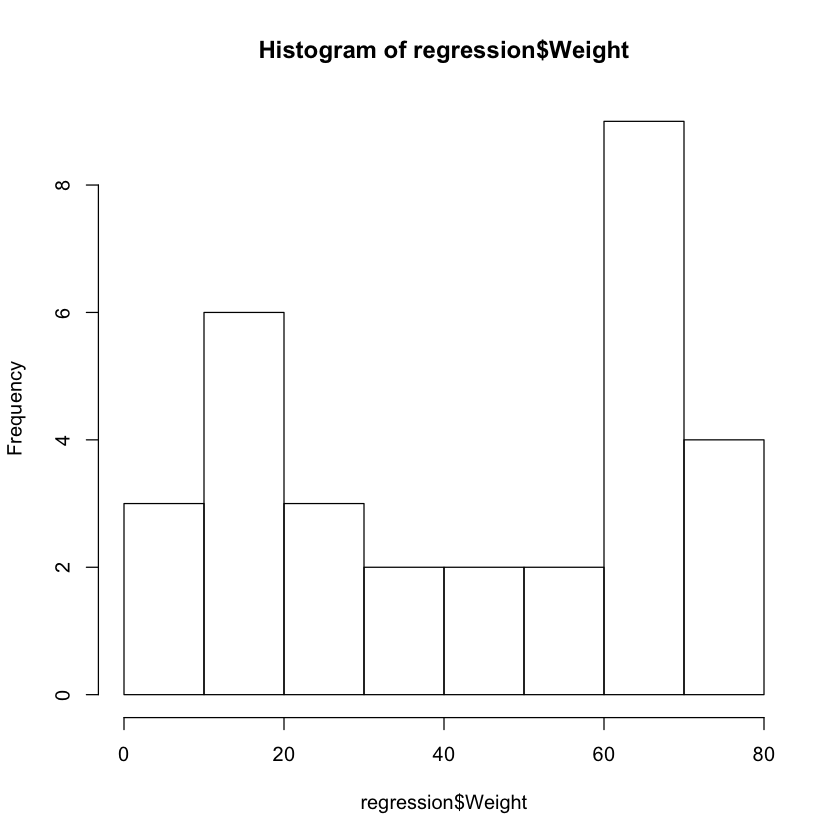

In [42]:
hist(regression$Weight)

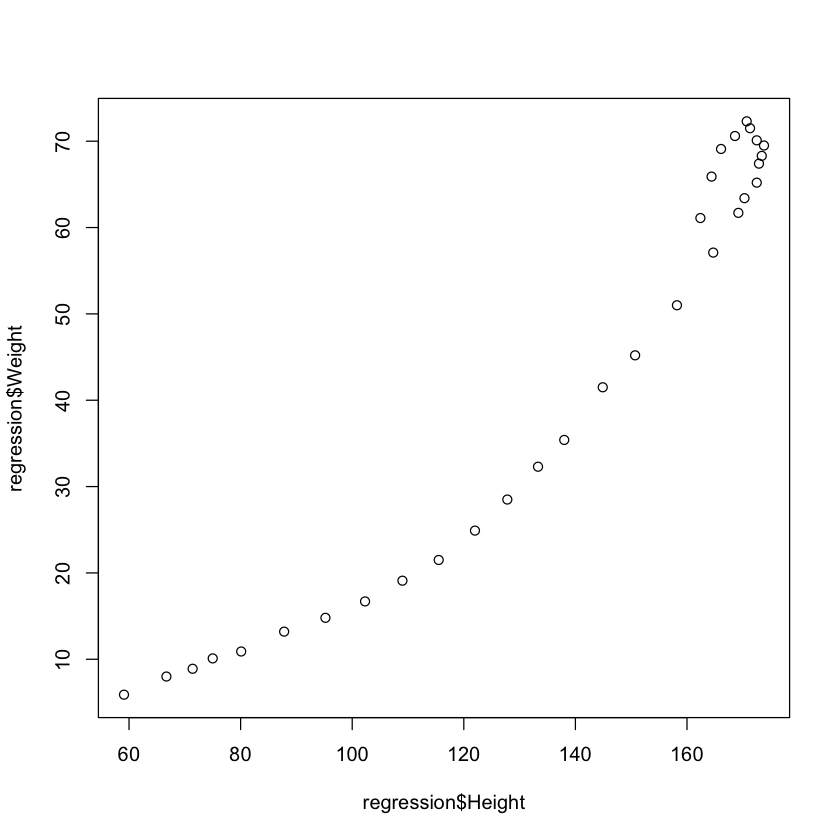

In [43]:
plot(regression$Height, regression$Weight) # 분석하기 좋은 데이터 (완전 scattered 되어있는 경우에는 머신러닝으로)

In [44]:
# 상관계수
cor(regression$Height, regression$Weight)

[1] 0.9672103

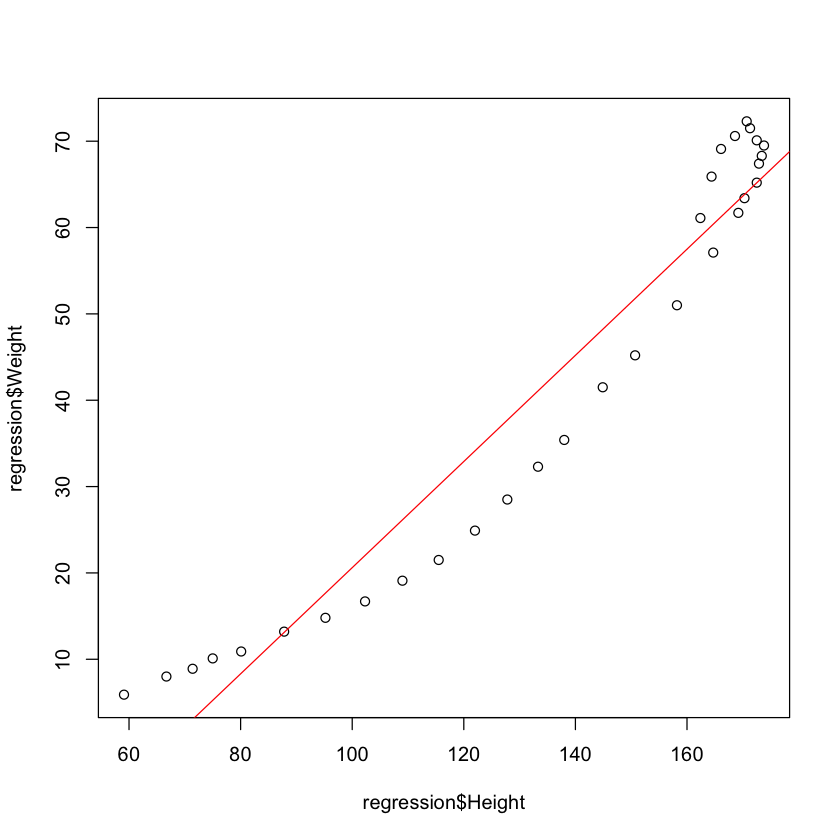

In [47]:
# 회귀선(중심선, 평균선) (종속변수 y ~ 독립변수 x)
plot(regression$Weight ~ regression$Height)

# 회귀식 
r <- lm(regression$Weight ~ regression$Height)
abline(r, col = "red")

In [48]:
# 분석결과
summary(r)

# lm(formula = regression$Weight ~ regression$Height) 함수식
# coefficients에서 intercept(y절편), regression$height가 있어야함 ***
# Adjusted R-squared:  0.9333 예측력  -> 93% 예측력 있는 회귀신이라는 것을 알 수 있음 
# Residual standard error: 6.355 표준오차 


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***
regression$Height   0.61474    0.02998  20.508  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 2.2e-16


In [49]:
# 회귀식 
r


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


y = ax + b 
Weight = 0.6147 * Height + -40.8659

In [55]:
# ex) 키가 170cm인 사람의 몸무게 
0.6147 * 170 + -40.8659

[1] 63.6331

In [53]:
# 정확한 값 (SEE 참고)
paste(63.6331 - 6.355, "~", 63.6331 + 6.355)

[1] "57.2781 ~ 69.9881"

# IQ

In [65]:
iq <- read.csv("../Data/IQ.csv", fileEncoding = "euc-kr")
head(iq)
str(iq)

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1


'data.frame':	10 obs. of  6 variables:
 $ 이름         : Factor w/ 10 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10
 $ 성적         : int  90 75 77 83 65 80 83 70 87 79
 $ IQ           : int  140 125 120 135 105 123 132 115 128 131
 $ 다니는.학원수: int  2 1 1 2 0 3 3 1 4 2
 $ 게임하는.시간: int  1 3 0 3 4 1 4 1 0 2
 $ TV시청.시간  : int  0 3 4 2 4 1 1 3 0 3


In [67]:
# 성적과 가장 관련이 깊은 항목은? 

cor(iq$성적, iq$IQ)
cor(iq$성적, iq$다니는.학원수)
cor(iq$성적, iq$게임하는.시간)
cor(iq$성적, iq$TV시청.시간)

cor(iq[,-1]) #이름은 빼고

[1] 0.9102242

[1] 0.7840514

[1] -0.3383549

[1] -0.8473333

,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


[1] 0.9102242

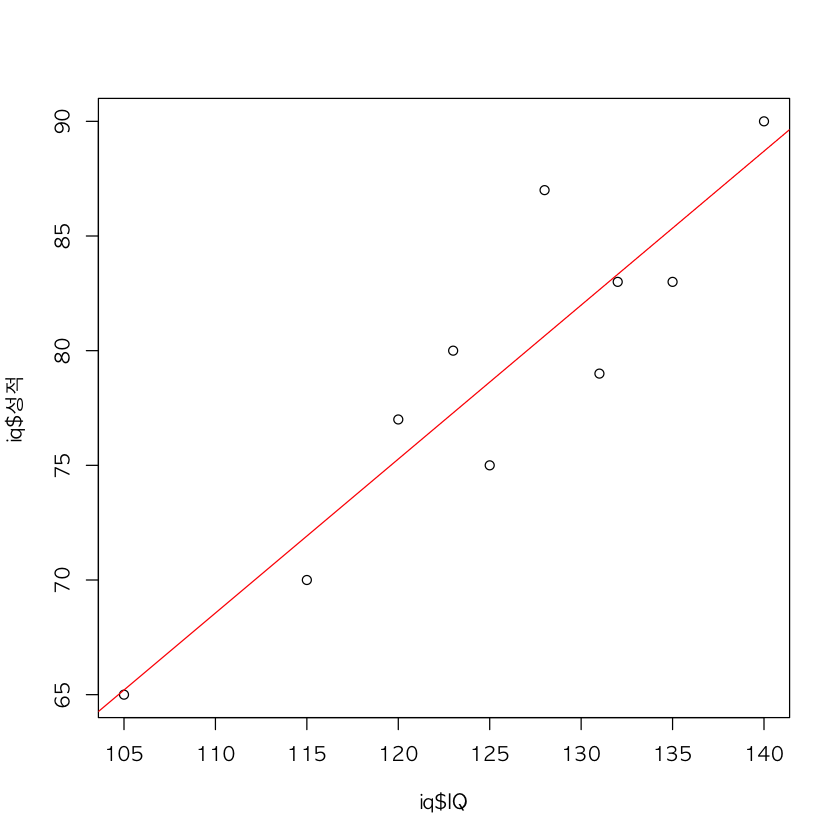

In [73]:
options(warn= -1)
par(family="AppleGothic")

# IQ가 126인 사람의 성적을 예측해보시오. 
cor(iq$성적, iq$IQ)
plot(iq$성적 ~ iq$IQ)
i <- lm(iq$성적 ~ iq$IQ)
abline(i, col="red")

In [74]:
summary(i)


Call:
lm(formula = iq$성적 ~ iq$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq$IQ         0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [75]:
i


Call:
lm(formula = iq$성적 ~ iq$IQ)

Coefficients:
(Intercept)        iq$IQ  
    -5.2918       0.6714  


In [80]:
#y=0.6714x+ -5.2918
(0.6714 * 126)+ -5.2918

[1] 79.3046

[1] 0.7840514

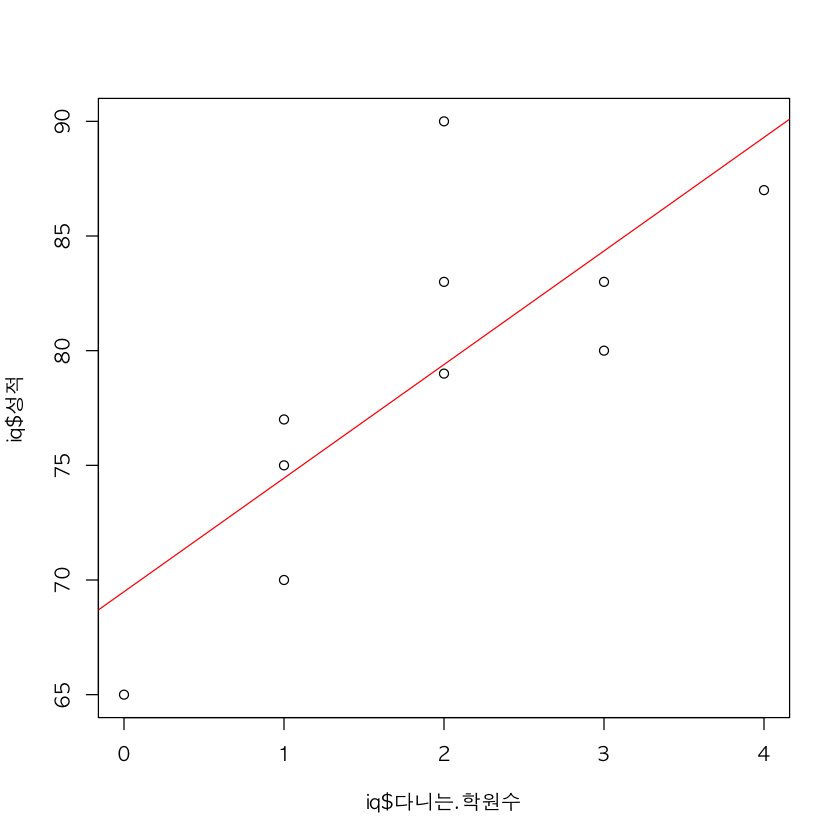

In [84]:
par(family="AppleGothic")
# 학원을 몇군데 다녀야 성적이 90점 이상이 될까? 

cor(iq$성적, iq$다니는.학원수)
plot(iq$성적 ~ iq$다니는.학원수)
hak <- lm(iq$성적 ~ iq$다니는.학원수)
abline(hak, col="red")

In [86]:
summary(hak)
hak


Call:
lm(formula = iq$성적 ~ iq$다니는.학원수)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4884 -3.8372 -0.8721  2.0581 10.6047 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        69.488      3.069  22.642 1.53e-08 ***
iq$다니는.학원수    4.953      1.386   3.573  0.00726 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.98 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264



Call:
lm(formula = iq$성적 ~ iq$다니는.학원수)

Coefficients:
     (Intercept)  iq$다니는.학원수  
          69.488             4.953  


In [94]:
# y= 4.953x + 69.488
4.953 * 4 + 69.488 # => 4개 다니면 89.3점, 4.2개 다니면 90점 이상 가능. 
3.7~~

[1] 89.3

# 다중 회귀분석

In [95]:
# 여러 개의 항목들로 구성된 식으로 예측하는 방법 
# 회귀분석은 numeric이 아니면 할 수 없음 
data(attitude)
# 대형 금융기관의 사무직 직원을 대상으로 진급의 요소에 대한 설문조사 결과 

In [96]:
head(attitude)

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


In [97]:
str(attitude)

'data.frame':	30 obs. of  7 variables:
 $ rating    : num  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: num  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: num  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : num  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : num  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : num  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : num  45 47 48 35 47 34 35 41 31 41 ...


In [99]:
# rating을 제외한 변수들이 rating에 어떤 영향을 미치는지 회귀분석 
model <- lm(rating ~ ., data=attitude) #attitude에서 rating 뺀 (complaints~advance)
model


Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


In [100]:
# rating = 0.61319 * complaints + -0.07305 * privileges ...

In [101]:
# model 검토
summary(model) # coefficients 에서 별 3개 뜬 것 complaints가 가장 상관이 강하다, 그 다음은 learning 항목 


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


In [102]:
# Adjusted R-squared:  0.6628 

In [103]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거 (-> 최적화된 모델을 찾는 것)
reduced <- step(model, direction = "backward") 
# 결론적으로 <none> 위에 부분은 다 지워짐

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Coefficients:
(Intercept)   complaints     learning  
     9.8709       0.6435       0.2112  


In [104]:
summary(reduced)


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398    0.174    
complaints    0.6435     0.1185   5.432 9.57e-06 ***
learning      0.2112     0.1344   1.571    0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 6.058e-08


In [105]:
# Adjusted R-squared:  0.6864 <- 필요없는 것 제거 했더니 예측력 높아짐 (cf. 모든 변수 회귀분석 했을 때, 0.6628)

## iris에 대한 다중 회귀분석 

In [107]:
model <- lm(as.numeric(Species) ~ ., data=iris) 

In [108]:
summary(model)


Call:
lm(formula = as.numeric(Species) ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59215 -0.15368  0.01268  0.11089  0.55077 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.18650    0.20484   5.792 4.15e-08 ***
Sepal.Length -0.11191    0.05765  -1.941   0.0542 .  
Sepal.Width  -0.04008    0.05969  -0.671   0.5030    
Petal.Length  0.22865    0.05685   4.022 9.26e-05 ***
Petal.Width   0.60925    0.09446   6.450 1.56e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.5 on 4 and 145 DF,  p-value: < 2.2e-16


In [109]:
# Adjusted R-squared:  0.9285 

In [110]:
reduced <- step(model, direction = "backward")

Start:  AIC=-450.56
as.numeric(Species) ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width

               Df Sum of Sq    RSS     AIC
- Sepal.Width   1   0.02164 6.9823 -452.09
<none>                      6.9606 -450.56
- Sepal.Length  1   0.18090 7.1415 -448.71
- Petal.Length  1   0.77649 7.7371 -436.69
- Petal.Width   1   1.99710 8.9577 -414.72

Step:  AIC=-452.09
as.numeric(Species) ~ Sepal.Length + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
<none>                      6.9823 -452.09
- Sepal.Length  1   0.44324 7.4255 -444.86
- Petal.Length  1   1.51946 8.5017 -424.56
- Petal.Width   1   2.11632 9.0986 -414.38


In [111]:
summary(reduced)


Call:
lm(formula = as.numeric(Species) ~ Sepal.Length + Petal.Length + 
    Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60753 -0.16188  0.01367  0.11217  0.54740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.14469    0.19478   5.877 2.72e-08 ***
Sepal.Length -0.13624    0.04475  -3.044  0.00277 ** 
Petal.Length  0.25213    0.04473   5.637 8.67e-08 ***
Petal.Width   0.58689    0.08822   6.652 5.41e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2187 on 146 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9287 
F-statistic: 648.3 on 3 and 146 DF,  p-value: < 2.2e-16


In [112]:
# Adjusted R-squared:  0.9287 # Sepal.Width 없어짐. 없이 분석했을 때에 예측력 올라감 
reduced


Call:
lm(formula = as.numeric(Species) ~ Sepal.Length + Petal.Length + 
    Petal.Width, data = iris)

Coefficients:
 (Intercept)  Sepal.Length  Petal.Length   Petal.Width  
      1.1447       -0.1362        0.2521        0.5869  
